In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

dataset = train.merge(stores, on='Store', how='left')
dataset = dataset.merge(features, on=['Store', 'Date'], how='left')


In [3]:
store_sales = dataset.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top Stores by Total Sales:\n", store_sales.head())

Top Stores by Total Sales:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [4]:

top_stores = store_sales.head(3).index.tolist()

for store_id in top_stores:
    print(f"\nTop departments in Store {store_id}:")
    top_depts = (
        dataset[dataset['Store'] == store_id]
        .groupby('Dept')['Weekly_Sales']
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    print(top_depts)



Top departments in Store 20:
Dept
92    23542625.04
95    21537795.62
38    15759345.93
90    13707777.99
72    13154550.44
Name: Weekly_Sales, dtype: float64

Top departments in Store 4:
Dept
92    22789210.43
95    21054815.74
72    14477956.47
2     13390422.10
90    12762602.07
Name: Weekly_Sales, dtype: float64

Top departments in Store 14:
Dept
92    26101497.71
95    20655911.35
90    15325988.39
38    14780483.91
72    13462139.10
Name: Weekly_Sales, dtype: float64


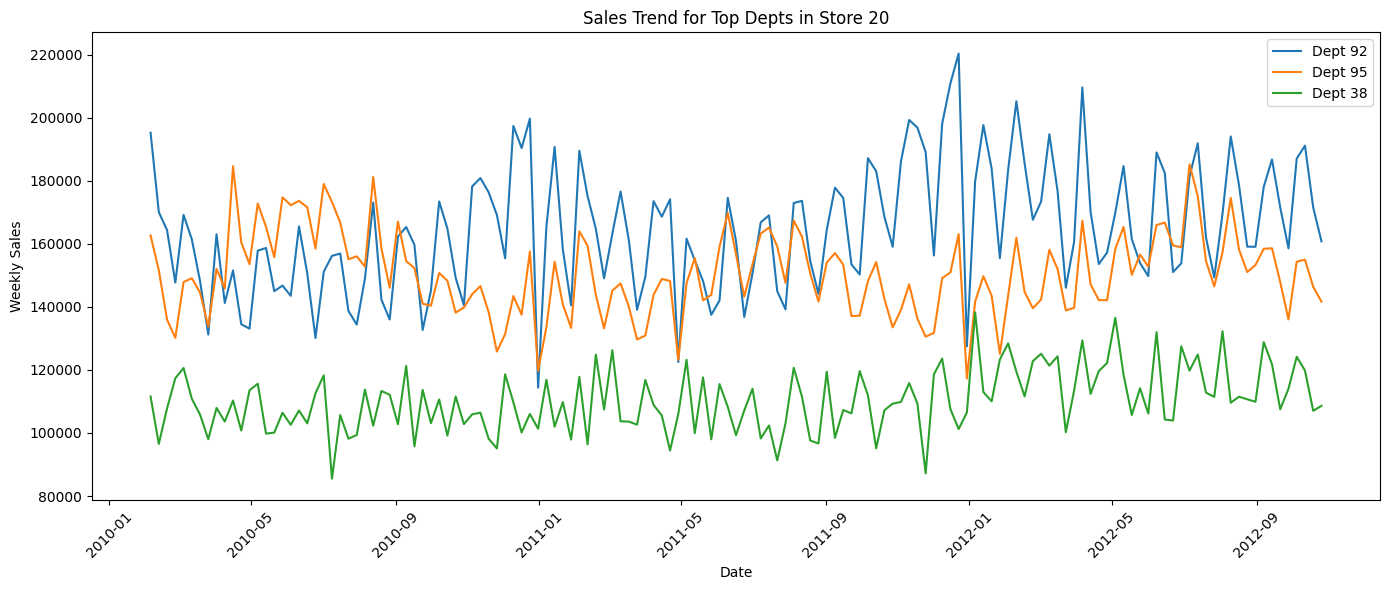

In [10]:
import matplotlib.pyplot as plt

store_id = top_stores[0]
top_depts = (
    dataset[dataset['Store'] == store_id]
    .groupby('Dept')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

plt.figure(figsize=(14, 6))
for dept_id in top_depts:
    temp = dataset[(dataset['Store'] == store_id) & (dataset['Dept'] == dept_id)]
    temp = temp.groupby('Date')['Weekly_Sales'].sum()
    plt.plot(temp.index, temp.values, label=f"Dept {dept_id}")

plt.title(f"Sales Trend for Top Depts in Store {store_id}")
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Store 20

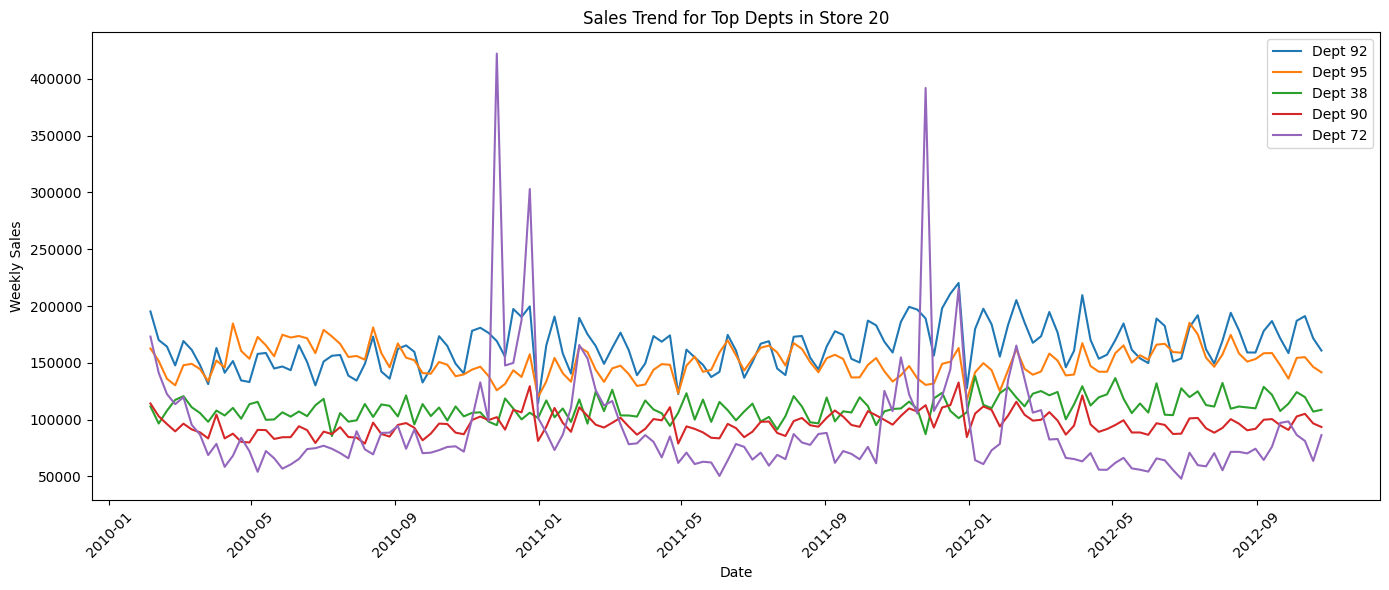

In [5]:
import matplotlib.pyplot as plt

store_id = top_stores[0]
top_depts = (
    dataset[dataset['Store'] == store_id]
    .groupby('Dept')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

plt.figure(figsize=(14, 6))
for dept_id in top_depts:
    temp = dataset[(dataset['Store'] == store_id) & (dataset['Dept'] == dept_id)]
    temp = temp.groupby('Date')['Weekly_Sales'].sum()
    plt.plot(temp.index, temp.values, label=f"Dept {dept_id}")

plt.title(f"Sales Trend for Top Depts in Store {store_id}")
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


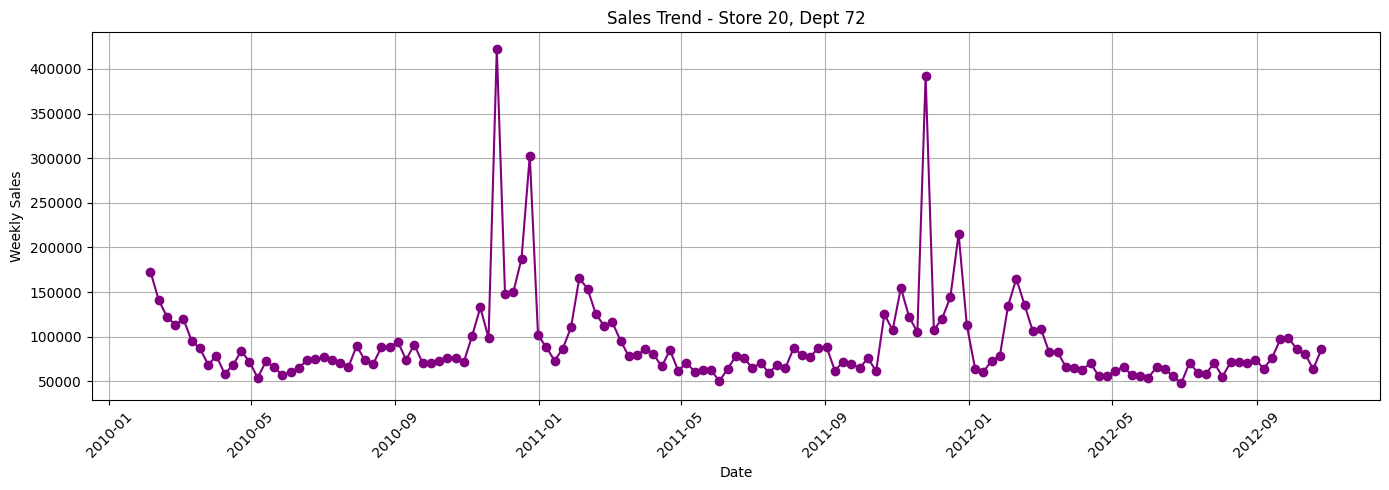

In [6]:
# Plot sales for Dept 72
import matplotlib.pyplot as plt

dept_72 = dataset[(dataset['Store'] == 20) & (dataset['Dept'] == 72)]
dept_72 = dept_72.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 5))
plt.plot(dept_72.index, dept_72.values, marker='o', linestyle='-', color='purple')
plt.title("Sales Trend - Store 20, Dept 72")
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
dept_72.sort_values(ascending=False).head(5)


Date
2010-11-26    422306.25
2011-11-25    392023.02
2010-12-24    303006.44
2011-12-23    215373.51
2010-12-17    187563.48
Name: Weekly_Sales, dtype: float64

# Store 14

Top departments in Store 14:
Dept
92    26101497.71
95    20655911.35
90    15325988.39
38    14780483.91
72    13462139.10
Name: Weekly_Sales, dtype: float64


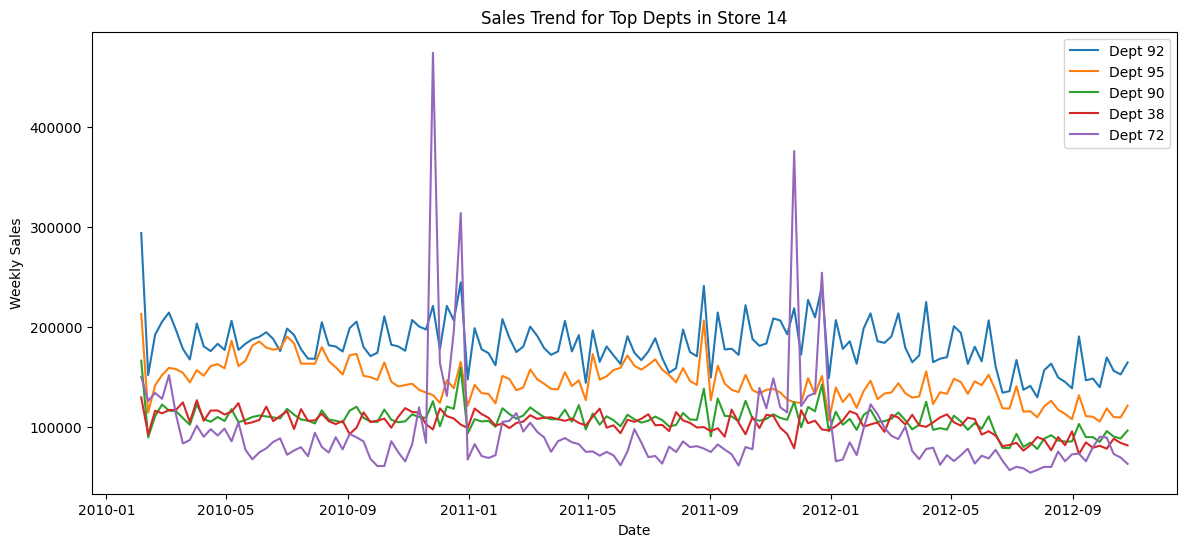


Top 5 sales weeks for Dept 92 in Store 14:
Date
2010-02-05    293966.05
2010-12-24    244628.76
2011-08-26    241120.00
2011-12-23    240895.28
2011-12-09    227088.13
Name: Weekly_Sales, dtype: float64

Top 5 sales weeks for Dept 95 in Store 14:
Date
2010-02-05    213042.66
2011-08-26    206433.98
2010-07-02    190412.82
2010-05-07    186083.37
2010-06-04    185532.46
Name: Weekly_Sales, dtype: float64

Top 5 sales weeks for Dept 90 in Store 14:
Date
2010-02-05    166263.81
2010-12-24    158949.00
2011-12-23    142419.60
2011-08-26    138231.70
2011-09-09    128470.61
Name: Weekly_Sales, dtype: float64

Top 5 sales weeks for Dept 38 in Store 14:
Date
2010-02-05    129530.62
2010-04-02    126730.81
2010-03-19    124538.30
2010-05-14    123786.20
2010-06-11    120325.16
Name: Weekly_Sales, dtype: float64

Top 5 sales weeks for Dept 72 in Store 14:
Date
2010-11-26    474330.10
2011-11-25    375948.31
2010-12-24    313933.22
2011-12-23    254275.88
2010-12-17    195768.40
Name: Weekly_Sa

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv", parse_dates=['Date'])

store_id = 14  

store_data = train[train['Store'] == store_id]

dept_sales = store_data.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)
top_depts = dept_sales.head(5).index

print(f"Top departments in Store {store_id}:\n{dept_sales.head()}")

plt.figure(figsize=(14, 6))
for dept in top_depts:
    dept_data = store_data[store_data['Dept'] == dept]
    dept_data = dept_data.sort_values('Date')
    plt.plot(dept_data['Date'], dept_data['Weekly_Sales'], label=f"Dept {dept}")

plt.title(f"Sales Trend for Top Depts in Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

for dept in top_depts:
    dept_data = store_data[store_data['Dept'] == dept].set_index('Date')['Weekly_Sales']
    top_weeks = dept_data.sort_values(ascending=False).head(5)
    print(f"\nTop 5 sales weeks for Dept {dept} in Store {store_id}:")
    print(top_weeks)


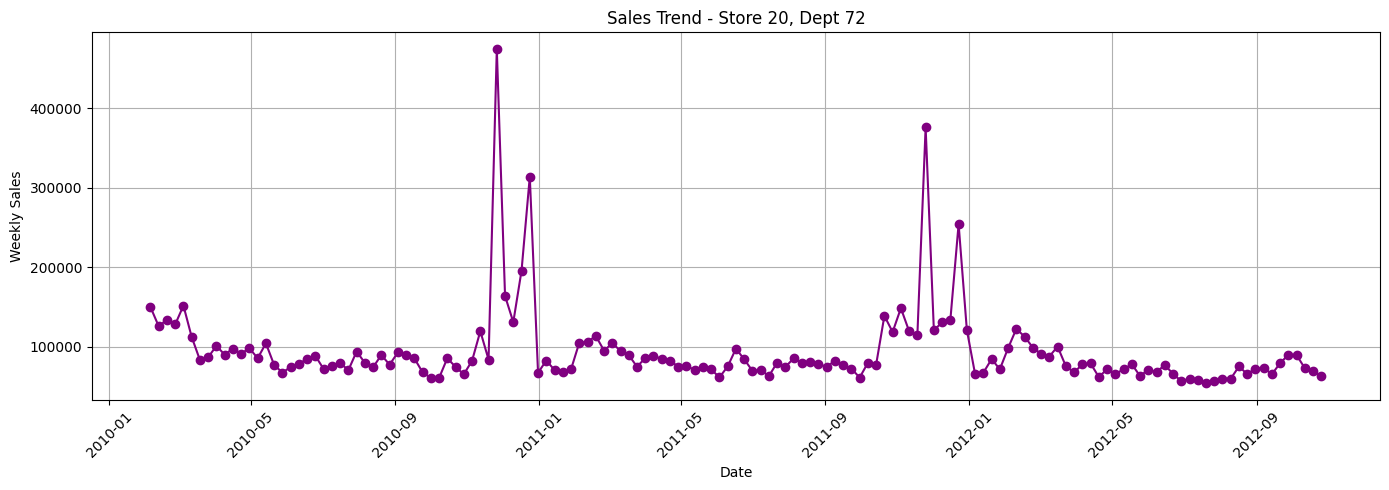

In [15]:
import matplotlib.pyplot as plt

dept_72 = dataset[(dataset['Store'] == 14) & (dataset['Dept'] == 72)]
dept_72 = dept_72.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 5))
plt.plot(dept_72.index, dept_72.values, marker='o', linestyle='-', color='purple')
plt.title("Sales Trend - Store 20, Dept 72")
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
dept_72.sort_values(ascending=False).head(5)


Date
2010-11-26    422306.25
2011-11-25    392023.02
2010-12-24    303006.44
2011-12-23    215373.51
2010-12-17    187563.48
Name: Weekly_Sales, dtype: float64

# Store 4

Top departments in Store 4:
Dept
92    22789210.43
95    21054815.74
72    14477956.47
2     13390422.10
90    12762602.07
Name: Weekly_Sales, dtype: float64


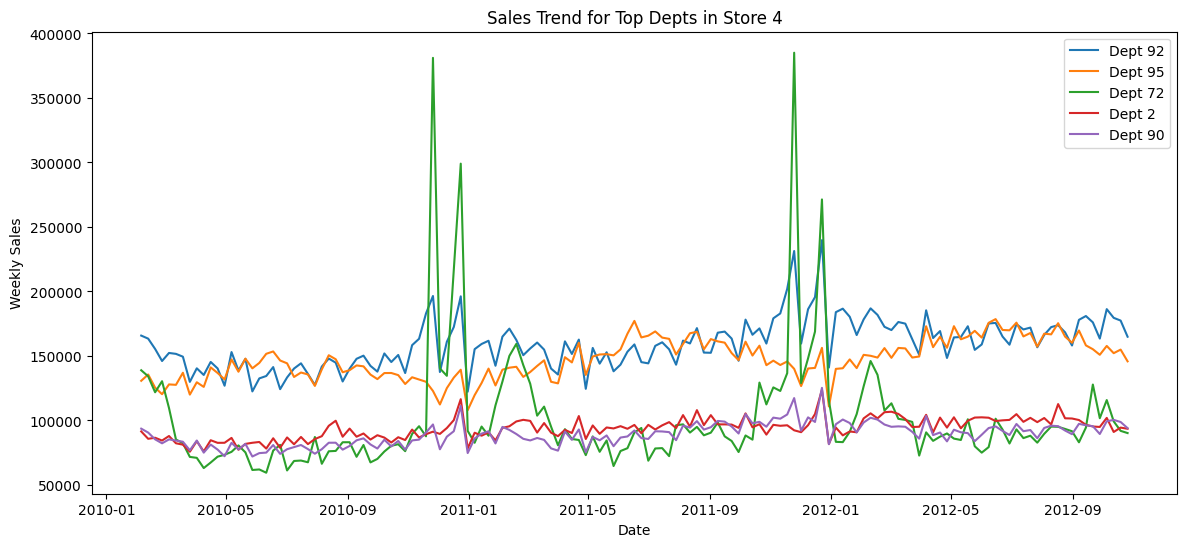


Top 5 sales weeks for Dept 92 in Store 4:
Date
2011-12-23    239759.31
2011-11-25    231334.61
2011-11-18    202030.01
2010-11-26    196464.78
2010-12-24    196184.40
Name: Weekly_Sales, dtype: float64

Top 5 sales weeks for Dept 95 in Store 4:
Date
2012-06-15    178542.28
2011-06-17    177156.22
2012-07-06    175792.76
2012-06-08    175664.14
2012-08-17    175362.48
Name: Weekly_Sales, dtype: float64

Top 5 sales weeks for Dept 72 in Store 4:
Date
2011-11-25    385051.04
2010-11-26    381072.11
2010-12-24    299060.25
2011-12-23    271320.74
2010-12-17    216877.34
Name: Weekly_Sales, dtype: float64

Top 5 sales weeks for Dept 2 in Store 4:
Date
2011-12-23    123735.98
2010-12-24    116473.44
2012-08-17    112674.99
2011-08-19    107974.78
2012-03-02    106758.96
Name: Weekly_Sales, dtype: float64

Top 5 sales weeks for Dept 90 in Store 4:
Date
2011-12-23    125242.78
2011-11-25    117326.29
2010-12-24    111234.93
2011-10-07    104945.18
2011-11-18    104613.45
Name: Weekly_Sales, d

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv", parse_dates=['Date'])

store_id = 4  

store_data = train[train['Store'] == store_id]

dept_sales = store_data.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)
top_depts = dept_sales.head(5).index

print(f"Top departments in Store {store_id}:\n{dept_sales.head()}")

plt.figure(figsize=(14, 6))
for dept in top_depts:
    dept_data = store_data[store_data['Dept'] == dept]
    dept_data = dept_data.sort_values('Date')
    plt.plot(dept_data['Date'], dept_data['Weekly_Sales'], label=f"Dept {dept}")

plt.title(f"Sales Trend for Top Depts in Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

for dept in top_depts:
    dept_data = store_data[store_data['Dept'] == dept].set_index('Date')['Weekly_Sales']
    top_weeks = dept_data.sort_values(ascending=False).head(5)
    print(f"\nTop 5 sales weeks for Dept {dept} in Store {store_id}:")
    print(top_weeks)


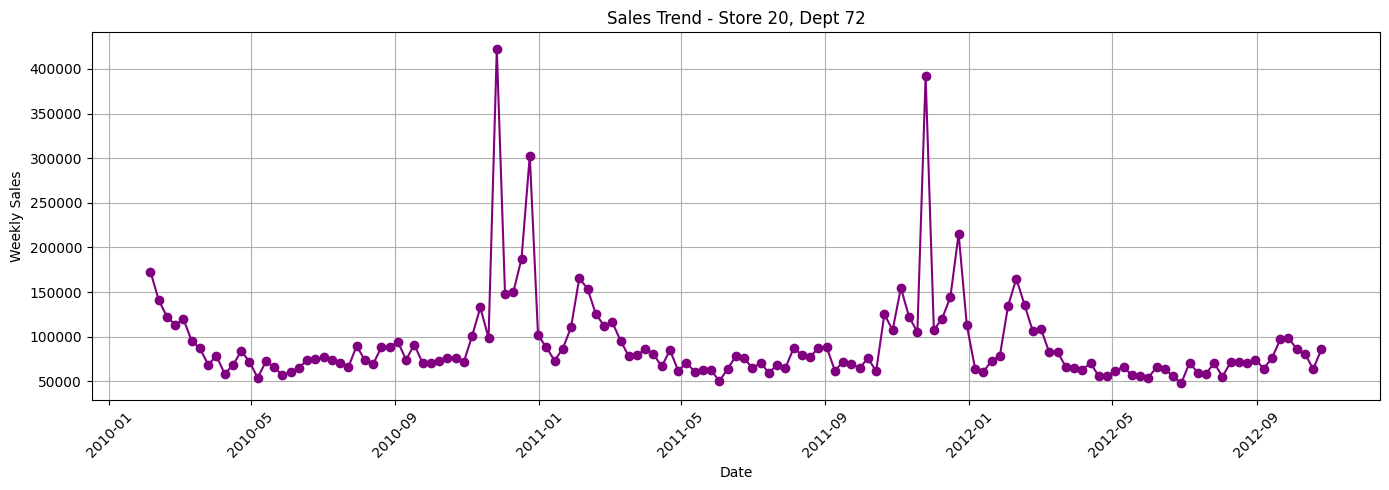

In [16]:
import matplotlib.pyplot as plt

dept_72 = dataset[(dataset['Store'] == 20) & (dataset['Dept'] == 72)]
dept_72 = dept_72.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 5))
plt.plot(dept_72.index, dept_72.values, marker='o', linestyle='-', color='purple')
plt.title("Sales Trend - Store 20, Dept 72")
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
dept_72.sort_values(ascending=False).head(5)


Date
2010-11-26    422306.25
2011-11-25    392023.02
2010-12-24    303006.44
2011-12-23    215373.51
2010-12-17    187563.48
Name: Weekly_Sales, dtype: float64

Checking only Dept 72 across these 3 stores

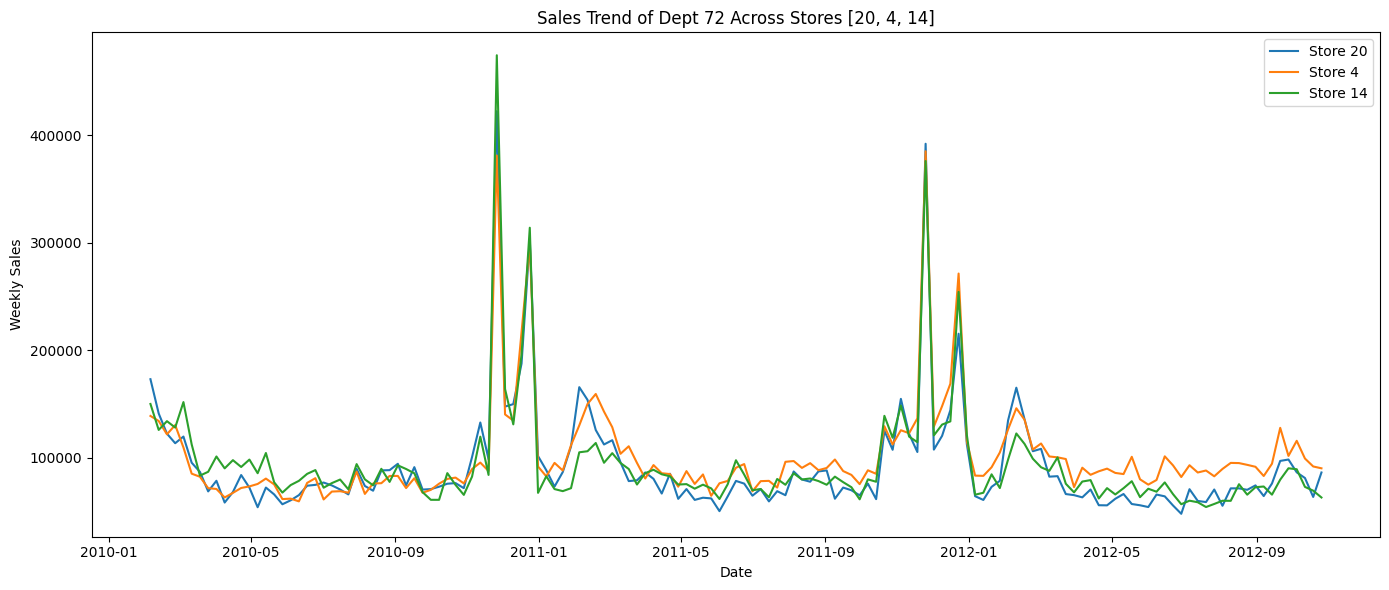

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv", parse_dates=['Date'])

store_ids = [20, 4, 14]
dept_id = 72

plt.figure(figsize=(14, 6))

for store_id in store_ids:
    dept_data = train[(train['Store'] == store_id) & (train['Dept'] == dept_id)]
    dept_data = dept_data.sort_values('Date')

    plt.plot(dept_data['Date'], dept_data['Weekly_Sales'], label=f"Store {store_id}")

plt.title(f"Sales Trend of Dept {dept_id} Across Stores {store_ids}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()


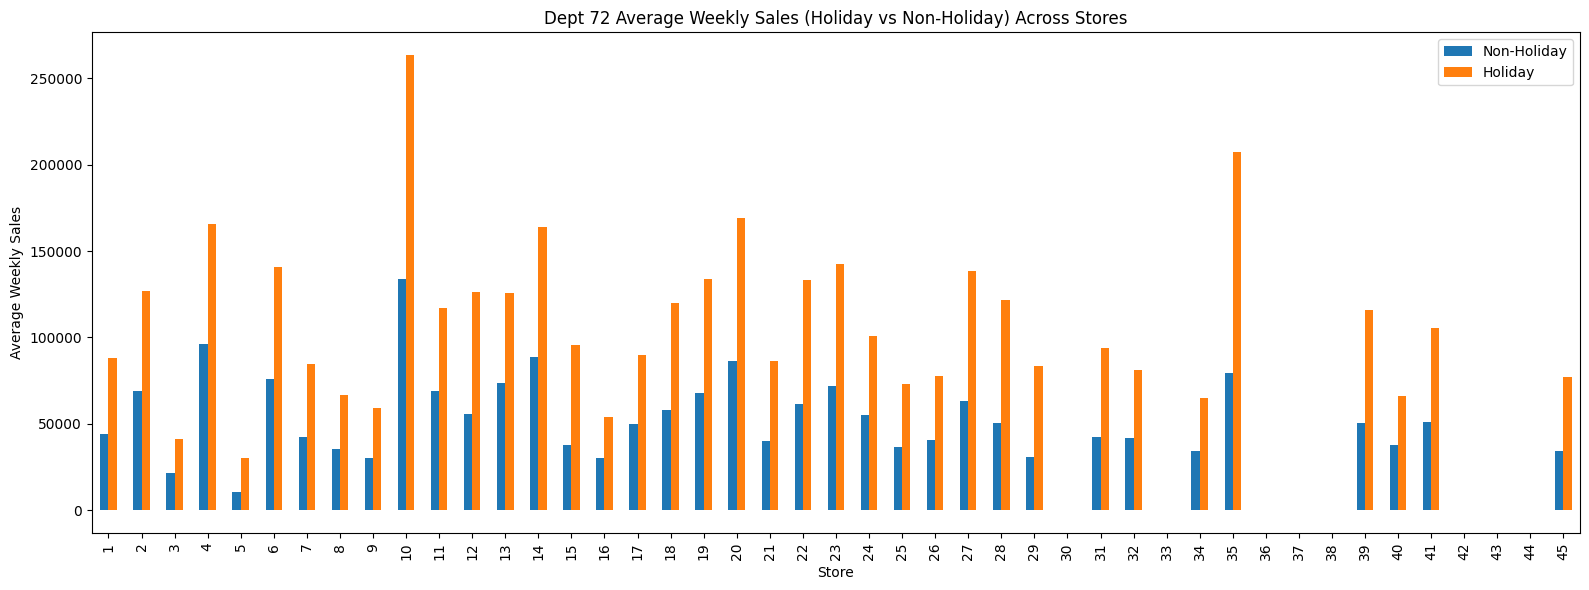

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
dept_72 = train[train['Dept'] == 72]

grouped = dept_72.groupby(['Store', 'IsHoliday'])['Weekly_Sales'].mean().unstack()

grouped.plot(kind='bar', figsize=(16,6))
plt.title('Dept 72 Average Weekly Sales (Holiday vs Non-Holiday) Across Stores')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.legend(['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()


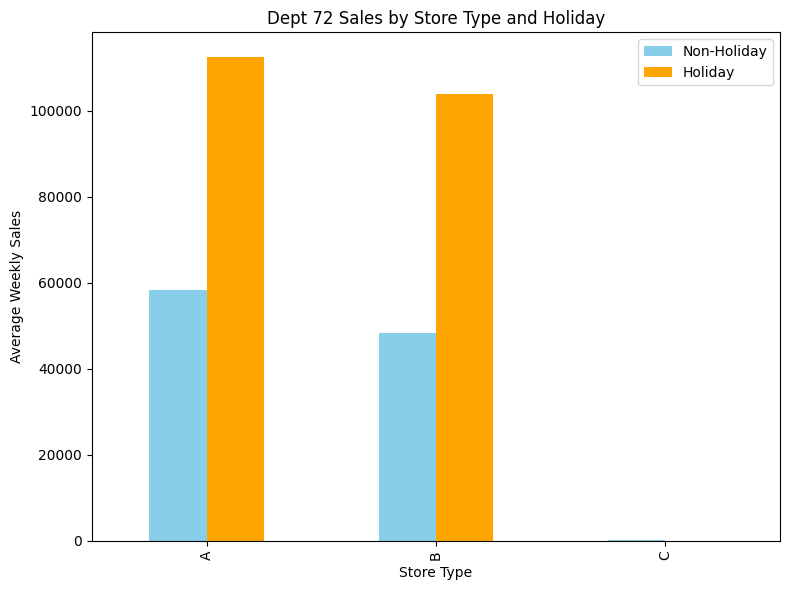

In [25]:

stores = pd.read_csv("stores.csv")

dept_72 = dept_72.merge(stores, on='Store', how='left')

type_grouped = dept_72.groupby(['Type', 'IsHoliday'])['Weekly_Sales'].mean().unstack()

type_grouped.plot(kind='bar', figsize=(8,6), color=['skyblue', 'orange'])
plt.title('Dept 72 Sales by Store Type and Holiday')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.legend(['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')

merged = train.merge(stores, on='Store', how='left')

grouped = merged.groupby(['Type', 'Dept'])['Weekly_Sales'].sum().reset_index()

top3_depts_per_type = grouped.groupby('Type').apply(lambda x: x.nlargest(3, 'Weekly_Sales')).reset_index(drop=True)

print(top3_depts_per_type)


  Type  Dept  Weekly_Sales
0    A    92  3.528455e+08
1    A    95  3.054578e+08
2    A    90  2.219519e+08
3    B    38  1.417301e+08
4    B    72  1.271272e+08
5    B     2  1.046594e+08
6    C    92  5.216276e+07
7    C    38  4.688221e+07
8    C    95  4.345046e+07


C:\Users\Chirag\AppData\Local\Temp\ipykernel_15476\1696871211.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_depts_per_type = grouped.groupby('Type').apply(lambda x: x.nlargest(3, 'Weekly_Sales')).reset_index(drop=True)


C:\Users\Chirag\AppData\Local\Temp\ipykernel_15476\1541753761.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_depts_per_type = grouped.groupby('Type').apply(lambda x: x.nlargest(3, 'Weekly_Sales')).reset_index(drop=True)


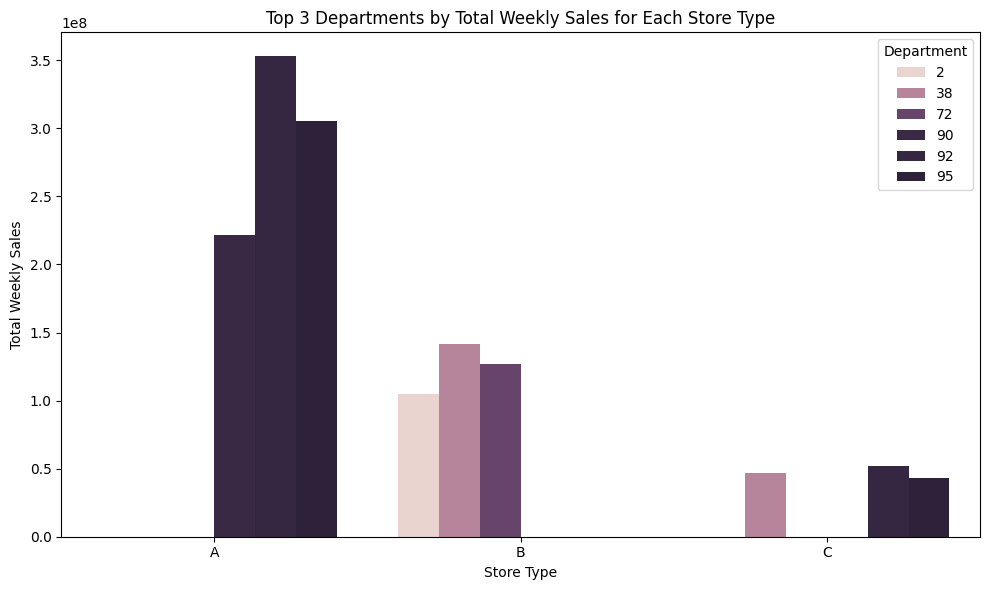

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')

merged = train.merge(stores, on='Store', how='left')

grouped = merged.groupby(['Type', 'Dept'])['Weekly_Sales'].sum().reset_index()

top3_depts_per_type = grouped.groupby('Type').apply(lambda x: x.nlargest(3, 'Weekly_Sales')).reset_index(drop=True)

plt.figure(figsize=(10,6))
sns.barplot(data=top3_depts_per_type, x='Type', y='Weekly_Sales', hue='Dept')

plt.title('Top 3 Departments by Total Weekly Sales for Each Store Type')
plt.ylabel('Total Weekly Sales')
plt.xlabel('Store Type')
plt.legend(title='Department')
plt.tight_layout()
plt.show()
